In [1]:
import matplotlib.pyplot as plt

plt.style.use('classic')
import numpy as np
import seaborn as sns
sns.set()
import pandas as pd
df = pd.read_csv('profile_error.csv')
# df.head()


              levels     error
0  translation level -8.468521
1  translation level -7.692504
2  translation level -8.447332
3  translation level -6.352617
4  translation level -9.277366


/tmp/ipykernel_210633/1385290065.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[['error']] = np.log10(df[['error']])


<Figure size 320x280 with 0 Axes>

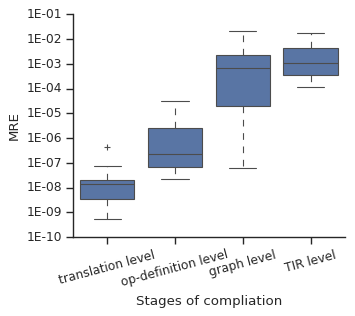

In [2]:
# tips = sns.load_dataREt("tips")
# plt.rcParams["font.family"] = "Sitka Text"
data2= df[['levels','error']]
data2[['error']] = np.log10(df[['error']])
print(data2.head())
plt.figure(figsize=(4, 3.5))

with sns.axes_style(style='ticks'):
    g= sns.catplot(x="levels", y="error",data=data2, kind="box", height=4.77, aspect=5.7/3.9)
    plt.ylabel("MRE") #("error occurred phaRE", "log of error value")
    plt.xlabel("Stages of compliation") #("error occurred phaRE", "log of error value")
g.fig.set_size_inches(4,3.5)
plt.xticks(rotation=15)
# plt.yticks(my_y_ticks)
fig1 = plt.gcf()
# ylabels
mintick = 1e-10
ylabels = ['1E-10','1E-09','1E-08','1E-07','1E-06','1E-05','1E-04','1E-03','1E-02','1E-01',]
plt.yticks(range(-10,0,1), labels=ylabels)

plt.savefig('profile_error.png', bbox_inches = 'tight')
plt.show()

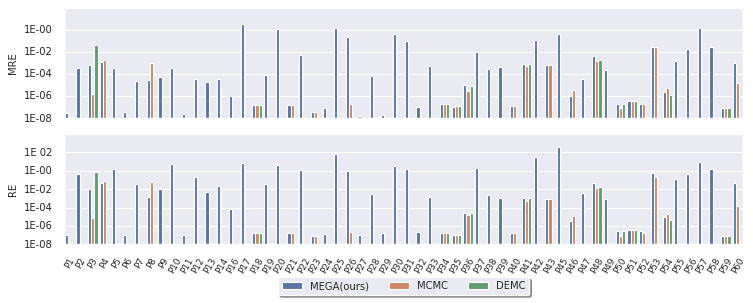

In [4]:
# tips = sns.load_dataset("tips")
T_SIZE = 8

SMALL_SIZE = 9
MEDIUM_SIZE = 9
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=T_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
# pd.set_option('max_columns',1000)
 
# pd.set_option('max_row',300)
df2 = pd.read_csv('synerrors.csv')
df2['MRE'] = df2['MRE'].apply(lambda x: x+1.1e-10 if x==0. else x)
df2['RE'] = df2['RE'].apply(lambda x: x+1.1e-10 if x==0. else x)
plt.figure(figsize=(9.5, 3.8))
# print(df2['RE'])
data2= df2
data2[['MRE']] = np.log10(df2[['MRE']])+10
data2[['RE']] = np.log10(df2[['RE']])+10
plt.subplot(2, 1, 1)

# data3 = data2[['ID','method','MRE']]
with sns.axes_style('white'):
            g = sns.barplot(x="ID",y='MRE', data=data2, 
                               hue='method',)
            # g.set_ylabels('Error founded in fuzzing')
plt.ylim(2)
plt.xlabel('')
ylabels = [r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',
           r'$10^{-2}$',r'$10^0$']
ylabels = ['1E-08','1E-06','1E-04','1E-02','1E-00',]
plt.yticks(range(2,11,2), labels=ylabels)
plt.legend('',frameon=False)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
# g.fig.set_size_inches(20.27,4.7)
# plt.xticks(rotation=40)
# plt.yticks(my_y_ticks)
plt.subplot(2, 1, 2)
with sns.axes_style('white'):
            g = sns.barplot(x="ID",y='RE', data=data2,
                               hue='method',)
            # g.set_ylabels('Error founded in fuzzing')
plt.xticks(rotation=60)
ylabels = [r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',
           r'$10^{-2}$',r'$10^0$',r'$10^2$',]

ylabels = ['1E-08','1E-06','1E-04','1E-02','1E-00','1E 02',]
plt.yticks(range(2,13,2), labels=ylabels)
# plt.get_legend().remove()
# g.fig.set_size_inches(20.27,4.7)
# plt.xticks(rotation=40)
# plt.yticks(my_y_ticks)
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),
          fancybox=True, shadow=True, ncol=7)

fig1 = plt.gcf()
plt.ylim(2)
# ylabels

# print(ylabels)
# plt.yticks(range(-10,0,1), labels=ylabels)

plt.savefig('syn_error.png', bbox_inches = 'tight')
plt.show()

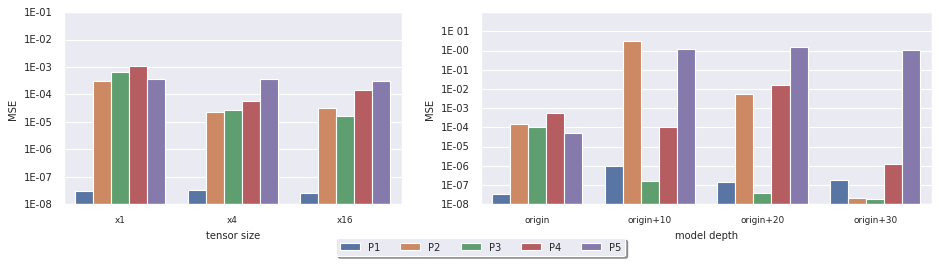

In [5]:
# tips = sns.load_dataset("tips")
df2 = pd.read_csv('size.csv')
df2['MSE'] = df2['MSE'].apply(lambda x: x+1.1e-10 if x==0. else x)
df2['SE'] = df2['SE'].apply(lambda x: x+1.1e-10 if x==0. else x)
df2['ID'] = df2['ID'].apply(lambda x: 'P'+str(x))
plt.figure(figsize=(14, 3))
from matplotlib import gridspec
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 4]) 

data2= df2
data2[['MSE']] = np.log10(df2[['MSE']])+10
data2[['SE']] = np.log10(df2[['SE']])+10

# data3 = data2[['ID','method','MSE']]
# plt.subplot(1, 2, 1)
plt.subplot(gs[0])
with sns.axes_style('white'):
            # g = sns.lineplot(x="type",y='MSE', data=data2,markers='<.+',
            #                    hue='ID',)
            g = sns.barplot(x="tensor size",y='MSE', data=data2,
                               hue='ID',)
plt.ylim(2)
ylabels = [r'$10^{-8}$',r'$10^{-7}$',r'$10^{-6}$',r'$10^{-5}$',r'$10^{-4}$',r'$10^{-3}$',
           r'$10^{-2}$',r'$10^{-1}$']
ylabels = ['1E-08','1E-07','1E-06','1E-05','1E-04','1E-03','1E-02','1E-01',
           ]
plt.yticks(range(2,10,1), labels=ylabels)
            # g.set_ylabels('Error founded in fuzzing')
# plt.xticks(rotation=45)
# plt.yticks(range(0,10,1), labels=ylabels)
# plt.get_legend().remove()
# g.fig.set_size_inches(20.27,4.7)
# plt.xticks(rotation=40)
# plt.yticks(my_y_ticks)
plt.legend('',frameon=False)
df3 = pd.read_csv('length.csv')
df3['MSE'] = df3['MSE'].apply(lambda x: x+1.1e-10 if x==0. else x)
df3['SE'] = df3['SE'].apply(lambda x: x+1.1e-10 if x==0. else x)
df3['ID'] = df3['ID'].apply(lambda x: 'P'+str(x))

data2= df3
data2[['MSE']] = np.log10(df3[['MSE']])+10
data2[['SE']] = np.log10(df3[['SE']])+10

# plt.subplot(1, 2, 2)
plt.subplot(gs[1])

# data3 = data2[['ID','method','MSE']]
with sns.axes_style('white'):
            # g = sns.lineplot(x="type",y='MSE', data=data2,markers=True,
            #                    hue='ID',)
            g = sns.barplot(x="model depth",y='MSE', data=data2,
                               hue='ID',)
            # g.set_ylabels('Error founded in fuzzing')
# plt.xticks(rotation=45)
# plt.yticks(range(0,10,1), labels=ylabels)
plt.ylim(2)
ylabels = [r'$10^{-8}$',r'$10^{-7}$',r'$10^{-6}$',r'$10^{-5}$',r'$10^{-4}$',r'$10^{-3}$',
           r'$10^{-2}$',r'$10^{-1}$',r'$10^0$',r'$10^1$']
ylabels = ['1E-08','1E-07','1E-06','1E-05','1E-04','1E-03','1E-02','1E-01',
           '1E-00','1E 01',]
plt.yticks(range(2,12,1), labels=ylabels)
plt.legend(loc='upper center', bbox_to_anchor=(0, -0.15),
          fancybox=True, shadow=True, ncol=9)
fig1 = plt.gcf()
# ylabels

# print(ylabels)
# plt.yticks(range(-10,0,1), labels=ylabels)

plt.savefig('property.png', bbox_inches = 'tight')
plt.show()

0     4.829131
1     6.110463
2    10.207057
3     9.739519
4     2.453756
5     2.643989
6     2.842495
dtype: float64


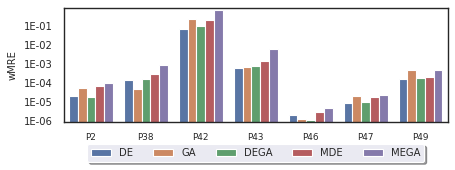

In [9]:
# tips = sns.load_dataset("tips")
df3 = pd.read_csv('ablationfuzz.csv')
df3['DE'] = df3['DE'].apply(lambda x: x+1.1e-10 if x==0. else x).astype('float64')
df3['GA'] = df3['GA'].apply(lambda x: x+1.1e-10 if x==0. else x).astype('float64')
df3['DEGA'] = df3['DEGA'].apply(lambda x: x+1.1e-10 if x==0. else x).astype('float64')
df3['MEGA'] = df3['MEGA'].apply(lambda x: x+1.1e-10 if x==0. else x).astype('float64')
df3['MDE'] = df3['MDE'].apply(lambda x: x+1.1e-10 if x==0. else x).astype('float64')
print(df3['MEGA']/df3['DE'])
# df3['ID'] = df3['ID'].apply(lambda x: 'P'+str(x))
plt.figure(figsize=(6.2, 1.78))
# sns.color_palette("husl", 8)
# sns.color_palette("hls", 8)
sns.color_palette()
sns.color_palette("Spectral", as_cmap=True)

data2= df3
data2[['DE']] = np.log10(df3[['DE']])+10
data2[['GA']] = np.log10(df3[['GA']])+10
data2[['MEGA']] = np.log10(df3[['MEGA']])+10
data2[['DEGA']] = np.log10(df3[['DEGA']])+10
data2[['MDE']] = np.log10(df3[['MDE']])+10

dfm = data2.melt('ID', var_name='Type', value_name='vals')
# data3 = data2[['ID','method','MSE']]
# import matplotlib.colors as colors
palette = ["#00CC00", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]
# palette = sns.color_palette('rocket', 10)
# palette = sns.color_palette("muted")


    
with sns.axes_style('white'):
            # g = sns.lineplot(x="type",y='MSE', data=data2,markers=True,
            #                    hue='ID',)
            g = sns.barplot(x="ID",y='vals',hue='Type', data=dfm,
            )
import itertools
# hatches = itertools.cycle(['//',  '\\','-','x','x', '*',  '\\','-',  'o', 'O', '.','//',])
# num_locations = 9
# for i, bar in enumerate(g.patches):
#     if i % num_locations == 0:
#         hatch = next(hatches)
#     bar.set_hatch(hatch)
            # g.set_ylabels('Error founded in fuzzing')
# plt.xticks(rotation=45)
plt.ylim(4)
ylabels = ['1E-06','1E-05','1E-04','1E-03','1E-02','1E-01',
         ]
plt.yticks(range(4,10,1), labels=ylabels)
# plt.get_legend().remove()
# g.fig.set_size_inches(20.27,4.7)
# plt.xticks(rotation=40)
# plt.yticks(my_y_ticks)
# plt.legend('',frameon=False)
# sns.color_palette("Spectral", as_cmap=True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=9)
plt.ylabel('wMRE')
fig1 = plt.gcf()

# ylabels

# print(ylabels)
# plt.yticks(range(-10,0,1), labels=ylabels)

plt.savefig('ablationfuzz.png', bbox_inches = 'tight')
plt.show()

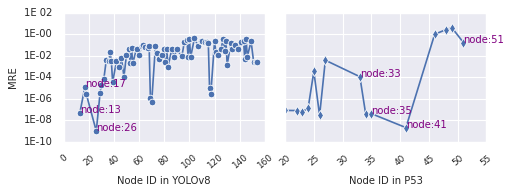

In [12]:
# tips = sns.load_dataset("tips")
df3 = pd.read_csv('propagate.csv')
df3['MRE'] = df3['MRE'].apply(lambda x: x+1.1e-10 if x==0. else x)
# df3['SE'] = df3['SE'].apply(lambda x: x+1.1e-10 if x==0. else x)
# df3['ID'] = df3['ID'].apply(lambda x: 'P'+str(x))
fig= plt.figure(figsize=(6.5, 2.5))
plt.subplot(1, 2, 1)
data2= df3
data2[['MRE']] = np.log10(df3[['MRE']])+10
# data2[['SE']] = np.log10(df3[['SE']])+10

# data3 = data2[['ID','method','MSE']]
with sns.axes_style('white'):
            # g = sns.lineplot(x="type",y='MSE', data=data2,markers=True,
            #                    hue='ID',)
            g = sns.lineplot(x="Nodeid",y='MRE', data=data2, marker='o',
                            )
            # g.set_ylabels('Error founded in fuzzing')
# label points on the plot
# print(data2["Nodeid"])
for x, y in zip(data2["Nodeid"], data2['MRE']):
 if y=='MRE':
    continue
 y = float(y)
 if x <28 and x!=18:
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    plt.text(x = x, # x-coordinate position of data label
 y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
 s = 'node:{:.0f}'.format(float(x)), # data label, formatted to ignore decimals
 color = 'purple') # set colour of line #s = '{:.0f}'.format(float(x)),
ylabels = [r'$10^{-10}$',r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',
           r'$10^{-2}$',r'$10^0$',r'$10^2$',]

ylabels = ['1E-10','1E-08','1E-06','1E-04','1E-02','1E-00','1E 02',]
plt.xlabel('Node ID in YOLOv8')
plt.xticks(rotation=40)

plt.yticks(range(0,13,2), labels=ylabels)

plt.subplot(1, 2, 2)
# plt.legend(loc='upper center', bbox_to_anchor=(0, -0.15),
         #  fancybox=True, shadow=True, ncol=9)
# plt.xticks(rotation=45)
# plt.yticks(range(0,10,1), labels=ylabels)
# plt.get_legend().remove()
# g.fig.set_size_inches(20.27,4.7)
# plt.xticks(rotation=40)
# plt.yticks(my_y_ticks)
df3 = pd.read_csv('p53p.csv')
df3['MRE'] = df3['MRE'].apply(lambda x: x+1.1e-10 if x==0. else x)
# df3['SE'] = df3['SE'].apply(lambda x: x+1.1e-10 if x==0. else x)
# df3['ID'] = df3['ID'].apply(lambda x: 'P'+str(x))
data2= df3
data2[['MRE']] = np.log10(df3[['MRE']])+10
# data2[['SE']] = np.log10(df3[['SE']])+10
# data3 = data2[['ID','method','MSE']]
with sns.axes_style('white'):
            # g = sns.lineplot(x="type",y='MSE', data=data2,markers=True,
            #                    hue='ID',)
            sns.lineplot(x="Nodeid",y='MRE', data=data2, marker='d',
                            )
for x, y in zip(data2["Nodeid"], data2['MRE']):
 if y=='MRE':
    continue
 y = float(y)
 if x >30 and x% 2==1 and x!= 49:
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    plt.text(x = x, # x-coordinate position of data label
 y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
 s = 'node:{:.0f}'.format(float(x)), # data label, formatted to ignore decimals
 color = 'purple')

plt.xticks(rotation=40)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False, # ticks along the top edge are off
    labelleft=False,      # ticks along the top edge are off
    ) # labels along the bottom edge are off labelbottom=False,
plt.ylabel('')
plt.xlabel('Node ID in P53')
fig.align_xlabels()
fig.align_ylabels()
# plt.subplot(1, 2, 2)

# df3 = pd.read_csv('resnet18p.csv')
# df3['MRE'] = df3['MRE'].apply(lambda x: x+1.1e-10 if x==0. else x)
# data2= df3
# data2[['MRE']] = np.log10(df3[['MRE']])+10
# with sns.axes_style('white'):
#             # g = sns.lineplot(x="type",y='MSE', data=data2,markers=True,
#             #                    hue='ID',)
#             sns.lineplot(x="Nodeid",y='MRE', data=data2, marker='d',palette="flare"
#                             )
# for x, y in zip(data2["Nodeid"], data2['MRE']):
#  if y=='MRE':
#     continue
#  y = float(y)
#  if x >200:
#  # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
#     plt.text(x = x, # x-coordinate position of data label
#  y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
#  s = 'node:{:.0f}'.format(float(x)), # data label, formatted to ignore decimals
#  color = 'blue')
# ylabels = [r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',
#            r'$10^{-2}$',r'$10^0$',r'$10^2$',]

# ylabels = ['1E-05','1E-04','1E-03','1E-02','1E-01','1E 01','1E 02']
# plt.xlabel('Node ID in Resnet18')
# plt.yticks(range(5,12,1), labels=ylabels)
fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0.1, hspace =0)#调整子图间距

fig = plt.gcf()
# ylabels
# plt.legend('',frameon=False)

# print(ylabels)
# plt.yticks(range(-10,0,1), labels=ylabels)

plt.savefig('propagate.png', bbox_inches = 'tight')
plt.show()

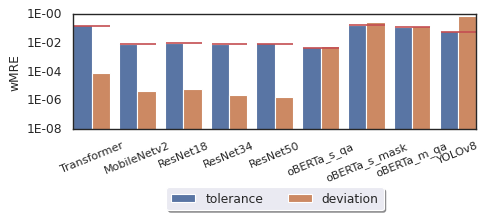

In [16]:
# tips = sns.load_dataset("tips")
T_SIZE = 10

SMALL_SIZE = 11
MEDIUM_SIZE = 11
BIGGER_SIZE = 11

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=T_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
# tips = sns.load_dataset("tips")
df3 = pd.read_csv('dnn.csv')
df3['Err_framework'] = df3['Err_framework'].apply(lambda x: x+1.1e-10 if x==0. else x).astype('float64')#Err_framework,Err_optimization,tolerance
df3['Err_optimization'] = df3['Err_optimization'].apply(lambda x: x+1.1e-10 if x==0. else x).astype('float64')
df3['tolerance'] = df3['tolerance'].apply(lambda x: x+1.1e-10 if x==0. else x).astype('float64')

# df3['ID'] = df3['ID'].apply(lambda x: 'P'+str(x))
plt.figure(figsize=(6.5, 1.8))
# sns.color_palette("husl", 8)
# sns.color_palette("hls", 8)
sns.color_palette()
sns.color_palette("Spectral", as_cmap=True)

data2= df3
data2[['tolerance']] = np.log10(df3[['tolerance']])+10
data2[['deviation']] = np.log10(df3[['Err_optimization']])+10
data2[['Err_framework']] = np.log10(df3[['Err_framework']])+10

dfm = data2[['model','tolerance','deviation']].melt('model', var_name='Type', value_name='vals')#'Err_framework'
# data3 = data2[['ID','method','MSE']]
# import matplotlib.colors as colors
palette = ["#00CC00", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]
# palette = sns.color_palette('rocket', 10)
# palette = sns.color_palette("muted")
with sns.axes_style('white'):
            # g = sns.lineplot(x="type",y='MSE', data=data2,markers=True,
            #                    hue='ID',)
            g = sns.barplot(x="model",y='vals',hue='Type', data=dfm,
            )
        
            # g.set_ylabels('Error founded in fuzzing')
# plt.xticks(rotation=45)
num_locations = 9
import itertools
# hatches = itertools.cycle(['//',  '\\','.','o','x', '*',  '\\','-',  'o', 'O', '.','//',])
# for i, bar in enumerate(g.patches):
#     if i % num_locations == 0:
#         hatch = next(hatches)
#     bar.set_hatch(hatch)
plt.ylim(5)
ylabels = ['1E-08','1E-06','1E-04','1E-02','1E-00'
         ]
plt.yticks(range(2,11,2), labels=ylabels)
# plt.get_legend().remove()
# g.fig.set_size_inches(20.27,4.7)
plt.xticks(rotation=22)
# plt.yticks(my_y_ticks)
# plt.legend('',frameon=False)
# sns.color_palette("Spectral", as_cmap=True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.45),
          fancybox=True, shadow=True, ncol=9)
plt.ylabel('wMRE')
fig1 = plt.gcf()

# ylabels

# print(ylabels)
# plt.yticks(range(-10,0,1), labels=ylabels)
for k, y in enumerate(data2['tolerance']):
   plt.hlines(xmin=k-0.38,y=y-0.02,xmax=k+0.4,colors=['r'])
plt.savefig('dnn.png', bbox_inches = 'tight')
plt.show()